# Predicting Fire Alarms Using Multi-Sensor Data A Binary Classification

## Importing libraries

In [3]:
# Reading the data and dataset manipulation
import pandas as pd

# Linear algebra
import numpy as np

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Pipeline
from sklearn.pipeline import Pipeline

# Model selection

from sklearn.model_selection import GridSearchCV, train_test_split

# Model evaluation
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, auc
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [4]:
filename = 'smoke_detection_iot.csv'

In [5]:
data = pd.read_csv(filename, index_col=0)
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


## Exploring the dataset

In [6]:
data.shape

(62630, 15)

In [7]:
data.info

<bound method DataFrame.info of               UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
0      1654733331          20.000        57.36          0        400   12306   
1      1654733332          20.015        56.67          0        400   12345   
2      1654733333          20.029        55.96          0        400   12374   
3      1654733334          20.044        55.28          0        400   12390   
4      1654733335          20.059        54.69          0        400   12403   
...           ...             ...          ...        ...        ...     ...   
62625  1655130047          18.438        15.79        625        400   13723   
62626  1655130048          18.653        15.87        612        400   13731   
62627  1655130049          18.867        15.84        627        400   13725   
62628  1655130050          19.083        16.04        638        400   13712   
62629  1655130051          19.299        16.52        643        400   13696   

       

There are no missing values in the dataset, and all of the data is numeric.

In [8]:
data.describe

<bound method NDFrame.describe of               UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
0      1654733331          20.000        57.36          0        400   12306   
1      1654733332          20.015        56.67          0        400   12345   
2      1654733333          20.029        55.96          0        400   12374   
3      1654733334          20.044        55.28          0        400   12390   
4      1654733335          20.059        54.69          0        400   12403   
...           ...             ...          ...        ...        ...     ...   
62625  1655130047          18.438        15.79        625        400   13723   
62626  1655130048          18.653        15.87        612        400   13731   
62627  1655130049          18.867        15.84        627        400   13725   
62628  1655130050          19.083        16.04        638        400   13712   
62629  1655130051          19.299        16.52        643        400   13696   

     

In [9]:
data[data.duplicated()].sum()

UTC               0.0
Temperature[C]    0.0
Humidity[%]       0.0
TVOC[ppb]         0.0
eCO2[ppm]         0.0
Raw H2            0.0
Raw Ethanol       0.0
Pressure[hPa]     0.0
PM1.0             0.0
PM2.5             0.0
NC0.5             0.0
NC1.0             0.0
NC2.5             0.0
CNT               0.0
Fire Alarm        0.0
dtype: float64

No duplicates are present in the dataset

In [10]:
data.corr()['Fire Alarm'][:-1].sort_values(ascending=False)

CNT               0.673762
Humidity[%]       0.399846
Pressure[hPa]     0.249797
Raw H2            0.107007
NC2.5            -0.057707
NC1.0            -0.082828
PM2.5            -0.084916
eCO2[ppm]        -0.097006
PM1.0            -0.110552
NC0.5            -0.128118
Temperature[C]   -0.163902
TVOC[ppb]        -0.214743
Raw Ethanol      -0.340652
UTC              -0.389404
Name: Fire Alarm, dtype: float64

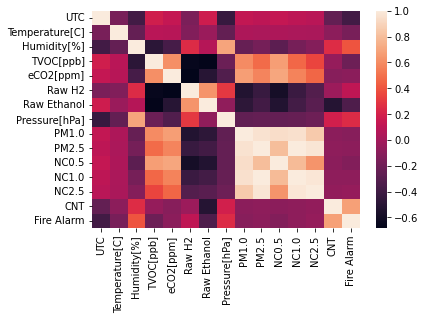

In [11]:
ax = sns.heatmap(data.corr())

In [12]:
target_column = 'Fire Alarm'
X = data.loc[:, data.columns != target_column]
y = data[[target_column]]

## Scaling the feature columns

In [13]:
scaler = MinMaxScaler()
columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)
X.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,0.050600,0.512692,0.723239,0.0,0.0,0.522488,0.525685,0.986014,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.050603,0.512875,0.712535,0.0,0.0,0.534928,0.547185,0.987013,0.0,0.0,0.0,0.0,0.0,0.00004
2,0.050605,0.513046,0.701520,0.0,0.0,0.544179,0.565731,0.986347,0.0,0.0,0.0,0.0,0.0,0.00008
3,0.050607,0.513229,0.690971,0.0,0.0,0.549282,0.579682,0.986125,0.0,0.0,0.0,0.0,0.0,0.00012
4,0.050610,0.513412,0.681818,0.0,0.0,0.553429,0.591498,0.987013,0.0,0.0,0.0,0.0,0.0,0.00016


## Check for unbalanced classes

In [14]:
data['Fire Alarm'].value_counts(normalize=True)

1    0.714626
0    0.285374
Name: Fire Alarm, dtype: float64

Here we can see that there is an imbalance in the classes of our target label

## Split data into train and test splits

**Note:** since there are imbalance between classes we will stratify the train and test splits

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(50104, 14)

In [17]:
y_train.shape

(50104, 1)

In [18]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_pred=lr.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
ac=accuracy_score(y_test,y_pred)*100
print('Accuracy:',ac)

Accuracy: 96.43142264090692


In [20]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3575
           1       0.99      0.96      0.97      8951

    accuracy                           0.96     12526
   macro avg       0.95      0.97      0.96     12526
weighted avg       0.97      0.96      0.96     12526



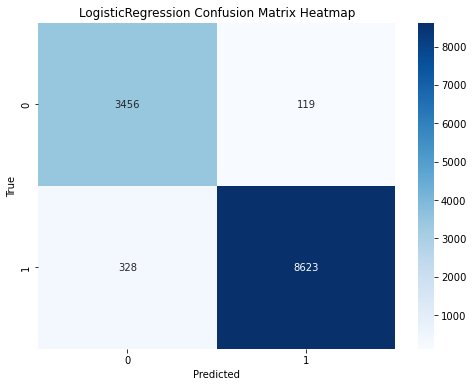

In [21]:
cm=confusion_matrix(y_test,y_pred)
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LogisticRegression Confusion Matrix Heatmap')
plt.show()

In [24]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pred1=rf.predict(X_test)
from sklearn.metrics import accuracy_score
acc1=accuracy_score(y_test,y_pred1)*100
print('Accuracy:',acc1)

Accuracy: 100.0


In [26]:
report=classification_report(y_test,y_pred1)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      1.00      1.00      8951

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



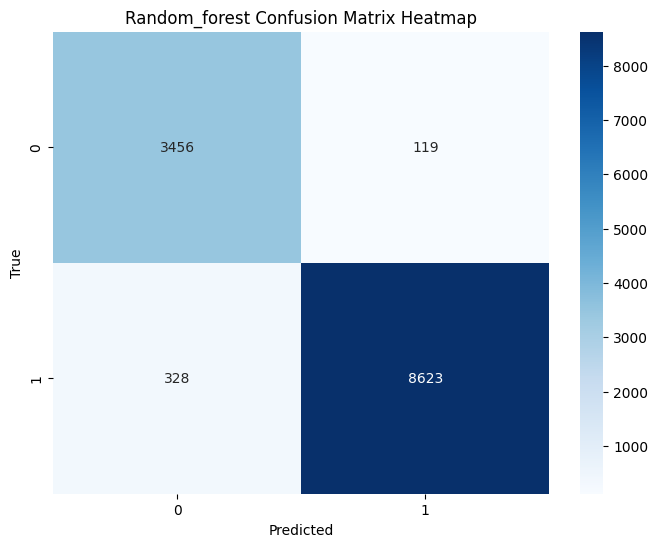

In [79]:
cm1=confusion_matrix(y_test,y_pred1)
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random_forest Confusion Matrix Heatmap')
plt.show()

In [27]:
y_pred1

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [28]:
prediction_df=pd.DataFrame({'Predicted':y_pred1})

In [29]:
prediction_df

,Predicted
0,1
1,1
2,0
3,0
4,1
...,...
12521,1
12522,1
12523,0
12524,1
